## Download and preprocess CCLE data

In [1]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg

### Download cell line info and expression data

In [2]:
if os.path.isfile(cfg.ccle_sample_info):
    ccle_sample_info_df = pd.read_csv(cfg.ccle_sample_info, sep=',', index_col=0)
else:
    print('Loading sample info from CCLE download page...', file=sys.stderr)
    # URL from CCLE public download data:
    # https://depmap.org/portal/download/
    ccle_sample_info_df = pd.read_csv(
        'https://ndownloader.figshare.com/files/35020903',
        sep=',', index_col=0
    )
    os.makedirs(os.path.join(cfg.data_dir, 'ccle'), exist_ok=True)
    ccle_sample_info_df.to_csv(cfg.ccle_sample_info)

print(ccle_sample_info_df.shape)
print(ccle_sample_info_df.columns)
ccle_sample_info_df.iloc[:5, :5]

(1840, 28)
Index(['cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias',
       'COSMICID', 'sex', 'source', 'RRID', 'WTSI_Master_Cell_ID',
       'sample_collection_site', 'primary_or_metastasis', 'primary_disease',
       'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments',
       'lineage', 'lineage_subtype', 'lineage_sub_subtype',
       'lineage_molecular_subtype', 'default_growth_pattern',
       'model_manipulation', 'model_manipulation_details', 'patient_id',
       'parent_depmap_id', 'Cellosaurus_NCIt_disease', 'Cellosaurus_NCIt_id',
       'Cellosaurus_issues'],
      dtype='object')


,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID
DepMap_ID,,,,,
ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN
ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN
ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN
ACH-000043,Hs 895.T,HS895T,HS895T_FIBROBLAST,NaN,NaN
ACH-000049,HEK TE,HEKTE,HEKTE_KIDNEY,NaN,NaN


In [3]:
if os.path.isfile(cfg.ccle_expression):
    ccle_expression_df = pd.read_csv(cfg.ccle_expression, sep=',', index_col=0)
else:
    print('Loading expression data from CCLE download page...', file=sys.stderr)
    # URL from CCLE public download data:
    # https://depmap.org/portal/download/
    ccle_expression_df = pd.read_csv(
        'https://ndownloader.figshare.com/files/34989919',
        sep=',', index_col=0
    )
    os.makedirs(os.path.join(cfg.data_dir, 'ccle'), exist_ok=True)
    ccle_expression_df.to_csv(cfg.ccle_expression)

ccle_expression_df.index.name = 'DepMap_ID'
    
print(ccle_expression_df.shape)
ccle_expression_df.iloc[:5, :5]

Loading expression data from CCLE download page...


(1406, 19221)


,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732)
DepMap_ID,,,,,
ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537
ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620
ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279
ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064
ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896


### Download and process mutation data

In [4]:
if os.path.isfile(cfg.ccle_mutation):
    ccle_mutation_df = pd.read_csv(cfg.ccle_mutation, sep=',', index_col=0)
else:
    print('Loading mutation data from CCLE download page...', file=sys.stderr)
    # URL from CCLE public download data:
    # https://depmap.org/portal/download/
    ccle_mutation_df = pd.read_csv(
        'https://ndownloader.figshare.com/files/34989940', sep=','
    )
    os.makedirs(os.path.join(cfg.data_dir, 'ccle'), exist_ok=True)
    ccle_mutation_df.to_csv(cfg.ccle_mutation)
    
print(ccle_mutation_df.shape)
print(ccle_mutation_df.columns)
ccle_mutation_df.iloc[:5, :5]

/tmp/ipykernel_19064/2688031721.py:2: DtypeWarning: Columns (4,20,23,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ccle_mutation_df = pd.read_csv(cfg.ccle_mutation, sep=',', index_col=0)


(1235466, 32)
Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'NCBI_Build', 'Chromosome',
       'Start_position', 'End_position', 'Strand', 'Variant_Classification',
       'Variant_Type', 'Reference_Allele', 'Alternate_Allele', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Genome_Change', 'Annotation_Transcript',
       'DepMap_ID', 'cDNA_Change', 'Codon_Change', 'Protein_Change',
       'isDeleterious', 'isTCGAhotspot', 'TCGAhsCnt', 'isCOSMIChotspot',
       'COSMIChsCnt', 'ExAC_AF', 'Variant_annotation', 'CGA_WES_AC', 'HC_AC',
       'RD_AC', 'RNAseq_AC', 'SangerWES_AC', 'WGS_AC'],
      dtype='object')


,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position
0,VPS13D,55187,37,1,12359347
1,AADACL4,343066,37,1,12726308
2,IFNLR1,163702,37,1,24484172
3,TMEM57,55219,37,1,25785018
4,ZSCAN20,7579,37,1,33954141


In [5]:
# process mutations into binary matrix
# https://github.com/greenelab/pancancer/blob/d1b3de7fa387d0a44d0a4468b0ac30918ed66886/scripts/initialize/process_sample_freeze.py#L86
mutations = [
    'Frame_Shift_Del',
    'Frame_Shift_Ins',
    'In_Frame_Del',
    'In_Frame_Ins',
    'Missense_Mutation',
    'Nonsense_Mutation',
    'Nonstop_Mutation',
    'RNA',
    'Splice_Site',
    'Translation_Start_Site',
]

sample_mutations = (ccle_mutation_df
    .query('Variant_Classification in @mutations')
    .groupby(['DepMap_ID', 'Chromosome', 'Hugo_Symbol'])
    .apply(len)
    .reset_index()
    .rename(columns={0: 'mutation'})
)

sample_mutations.iloc[:5, :5]

,DepMap_ID,Chromosome,Hugo_Symbol,mutation
0,ACH-000001,1,AADACL4,1
1,ACH-000001,1,C1orf192,1
2,ACH-000001,1,DUSP12,1
3,ACH-000001,1,FCRL5,1
4,ACH-000001,1,FLG2,1


In [6]:
ccle_mutation_binary_df = (sample_mutations
    .pivot_table(index='DepMap_ID',
                 columns='Hugo_Symbol',
                 values='mutation',
                 fill_value=0)
    .astype(bool)
    .astype(int)
)

print(ccle_mutation_binary_df.shape)
ccle_mutation_binary_df.iloc[:5, :5]

(1771, 19467)


Hugo_Symbol,A1BG,A1CF,A2M,A2ML1,A3GALT2
DepMap_ID,,,,,
ACH-000001,0,0,0,0,0
ACH-000002,0,0,0,0,0
ACH-000003,0,0,0,0,0
ACH-000004,0,0,0,0,0
ACH-000005,0,0,0,0,0


In [7]:
ccle_mutation_binary_df.sum(axis='columns').head()

DepMap_ID
ACH-000001    219
ACH-000002    133
ACH-000003    155
ACH-000004    190
ACH-000005    199
dtype: int64

In [8]:
ccle_mutation_binary_df.sum(axis='index').sort_values(ascending=False).head(10)

Hugo_Symbol
TTN      1143
TP53     1082
MUC16     791
OBSCN     512
LRP1B     460
SYNE1     449
RYR2      435
USH2A     434
PCLO      429
CSMD3     421
dtype: int64

In [9]:
ccle_mutation_binary_df.to_csv(cfg.ccle_mutation_binary)

### Visualize distribution of samples across cancer types/tissues

In [10]:
all_index = (ccle_sample_info_df.index
    .intersection(ccle_expression_df.index)
    .intersection(ccle_mutation_binary_df.index)
)
print(all_index.shape)

(1402,)


In [11]:
ccle_cancer_types = (ccle_sample_info_df
    .reindex(all_index)
    .groupby('primary_disease')
    .count()
    .reset_index()
    .iloc[:, [0, 1]]
    .rename(columns={'cell_line_name': 'count'})
)

ccle_cancer_types.head()

,primary_disease,count
0,Adrenal Cancer,1
1,Bile Duct Cancer,35
2,Bladder Cancer,36
3,Bone Cancer,37
4,Brain Cancer,80


In [12]:
ccle_tissues = (ccle_sample_info_df
    .reindex(all_index)
    .groupby('lineage')
    .count()
    .reset_index()
    .iloc[:, [0, 1]]
    .rename(columns={'cell_line_name': 'count'})
)

ccle_tissues.head()

,lineage,count
0,adrenal_cortex,1
1,bile_duct,41
2,blood,100
3,bone,37
4,breast,63


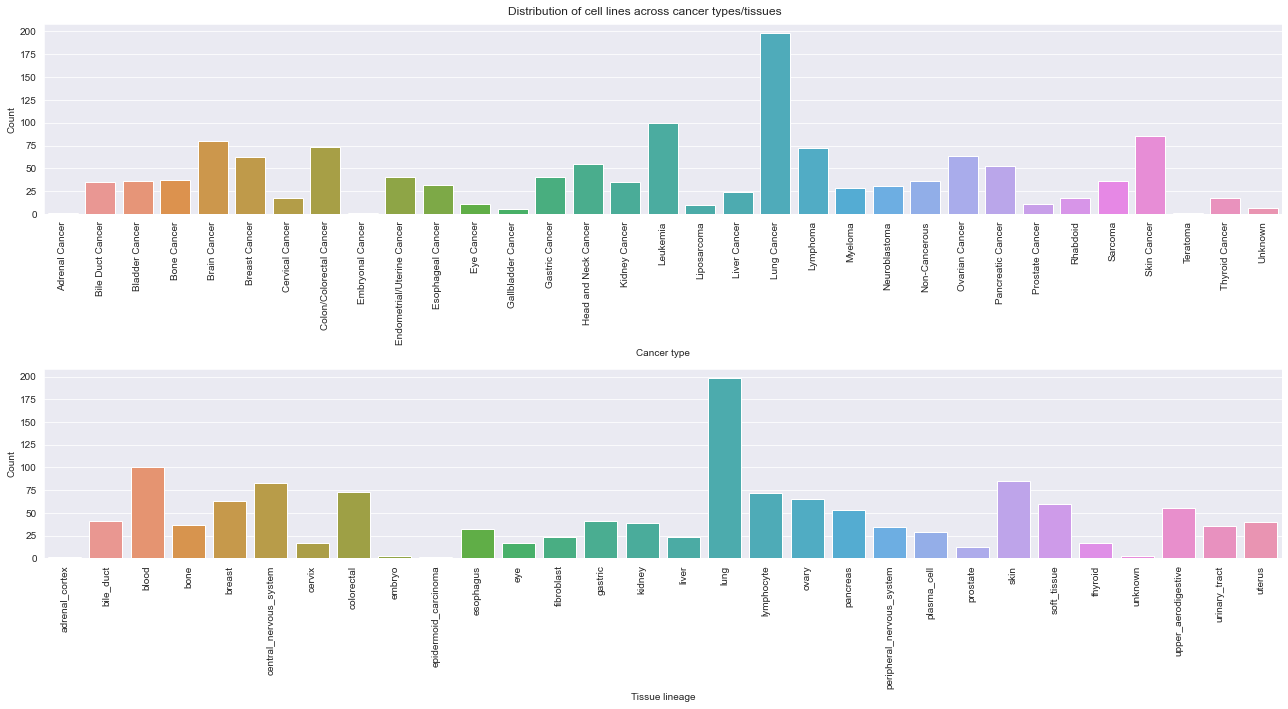

In [13]:
sns.set({'figure.figsize': (18, 10)})
fig, axarr = plt.subplots(2, 1)

sns.barplot(data=ccle_cancer_types, x='primary_disease', y='count', ax=axarr[0])
axarr[0].set_xticklabels(axarr[0].get_xticklabels(), rotation=90)
axarr[0].set_xlabel('Cancer type')
axarr[0].set_ylabel('Count')

sns.barplot(data=ccle_tissues, x='lineage', y='count', ax=axarr[1])
axarr[1].set_xticklabels(axarr[1].get_xticklabels(), rotation=90)
axarr[1].set_xlabel('Tissue lineage')
axarr[1].set_ylabel('Count')

plt.suptitle('Distribution of cell lines across cancer types/tissues')
plt.tight_layout()

### Visualize distribution of samples with mutation in a given gene

This should help us with setting sensible thresholds for building classifiers, since the dataset overall is considerably smaller than TCGA.

In [14]:
# gene to explore mutation distribution for
gene = 'RB1'

gene_index = (ccle_sample_info_df.index
    .intersection(ccle_expression_df.index)
    .intersection(ccle_mutation_binary_df[ccle_mutation_binary_df[gene] == 1].index)
)
print(gene_index.shape)

(130,)


In [15]:
ccle_gene_cancer_types = (ccle_sample_info_df
    .reindex(gene_index)
    .groupby('primary_disease')
    .count()
    .reset_index()
    .iloc[:, [0, 1]]
    .rename(columns={'cell_line_name': '{}_count'.format(gene)})
    .merge(ccle_cancer_types, how='right', on='primary_disease')
    .fillna(value=0)
)

ccle_gene_cancer_types['{}_proportion'.format(gene)] = (
    ccle_gene_cancer_types['{}_count'.format(gene)] / ccle_gene_cancer_types['count']
)

ccle_gene_cancer_types.head()

,primary_disease,RB1_count,count,RB1_proportion
0,Adrenal Cancer,0.0,1,0.000000
1,Bile Duct Cancer,2.0,35,0.057143
2,Bladder Cancer,7.0,36,0.194444
3,Bone Cancer,5.0,37,0.135135
4,Brain Cancer,12.0,80,0.150000


In [16]:
ccle_gene_tissues = (ccle_sample_info_df
    .reindex(gene_index)
    .groupby('lineage')
    .count()
    .reset_index()
    .iloc[:, [0, 1]]
    .rename(columns={'cell_line_name': '{}_count'.format(gene)})
    .merge(ccle_tissues, how='right', on='lineage')
    .fillna(value=0)
)
ccle_gene_tissues['{}_proportion'.format(gene)] = (
    ccle_gene_tissues['{}_count'.format(gene)] / ccle_gene_tissues['count']
)

ccle_gene_tissues.head()

,lineage,RB1_count,count,RB1_proportion
0,adrenal_cortex,0.0,1,0.000000
1,bile_duct,3.0,41,0.073171
2,blood,7.0,100,0.070000
3,bone,5.0,37,0.135135
4,breast,6.0,63,0.095238


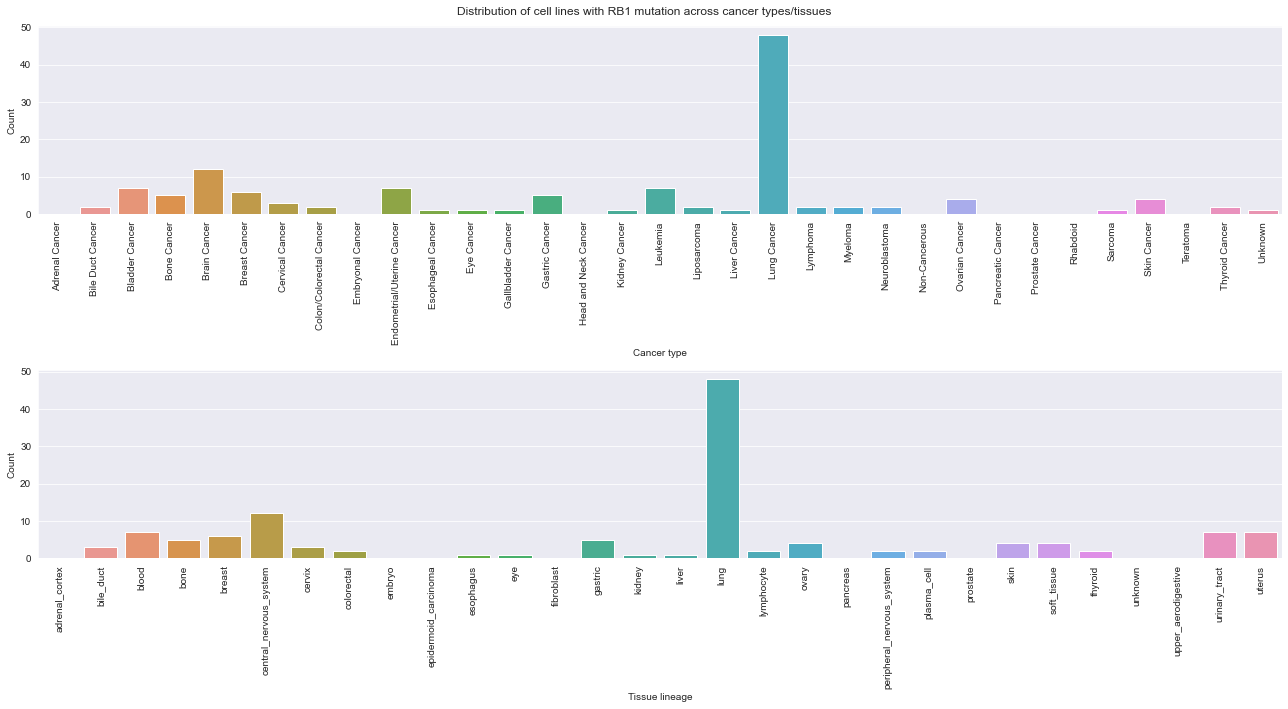

In [17]:
sns.set({'figure.figsize': (18, 10)})
fig, axarr = plt.subplots(2, 1)

sns.barplot(data=ccle_gene_cancer_types, x='primary_disease',
            y='{}_count'.format(gene),
            ax=axarr[0])
axarr[0].set_xticklabels(axarr[0].get_xticklabels(), rotation=90)
axarr[0].set_xlabel('Cancer type')
axarr[0].set_ylabel('Count')

sns.barplot(data=ccle_gene_tissues, x='lineage',
            y='{}_count'.format(gene),
            ax=axarr[1])
axarr[1].set_xticklabels(axarr[1].get_xticklabels(), rotation=90)
axarr[1].set_xlabel('Tissue lineage')
axarr[1].set_ylabel('Count')

plt.suptitle(
    'Distribution of cell lines with {} mutation across cancer types/tissues'.format(gene)
)
plt.tight_layout()

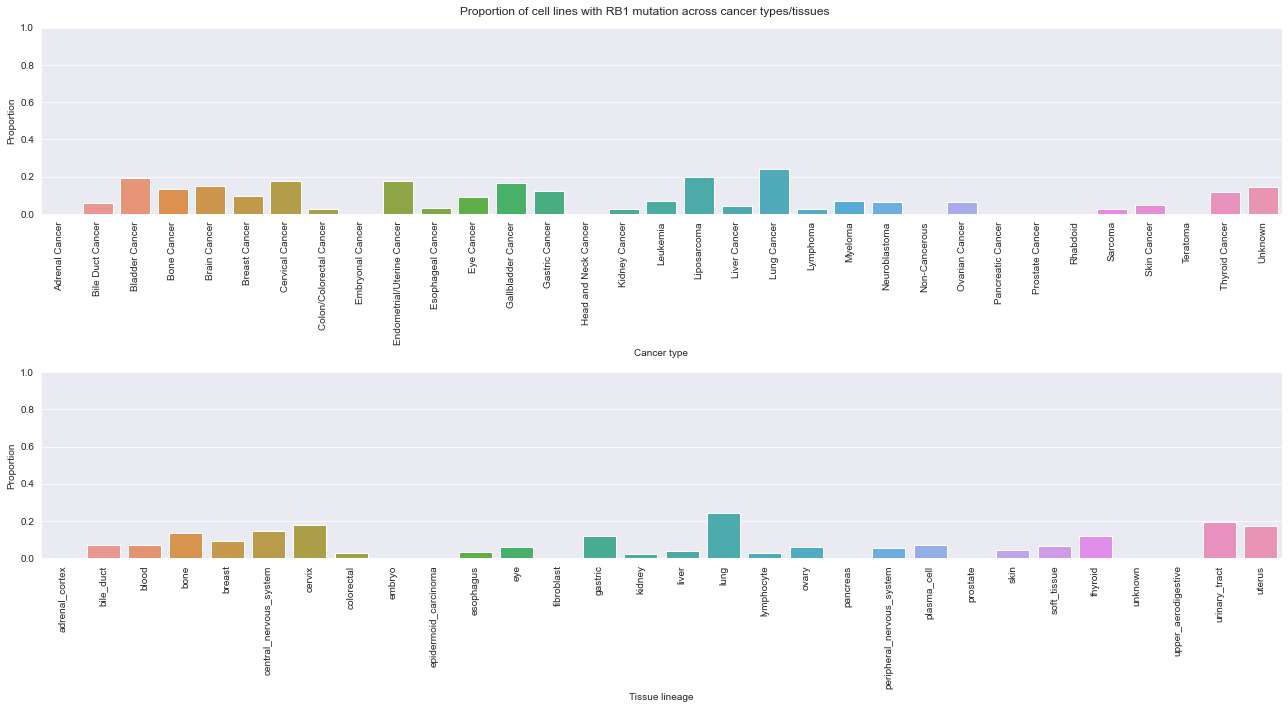

In [18]:
sns.set({'figure.figsize': (18, 10)})
fig, axarr = plt.subplots(2, 1)

sns.barplot(data=ccle_gene_cancer_types, x='primary_disease',
            y='{}_proportion'.format(gene),
            ax=axarr[0])
axarr[0].set_xticklabels(axarr[0].get_xticklabels(), rotation=90)
axarr[0].set_xlabel('Cancer type')
axarr[0].set_ylabel('Proportion')
axarr[0].set_ylim(0.0, 1.0)

sns.barplot(data=ccle_gene_tissues, x='lineage',
            y='{}_proportion'.format(gene),
            ax=axarr[1])
axarr[1].set_xticklabels(axarr[1].get_xticklabels(), rotation=90)
axarr[1].set_xlabel('Tissue lineage')
axarr[1].set_ylabel('Proportion')
axarr[1].set_ylim(0.0, 1.0)

plt.suptitle(
    'Proportion of cell lines with {} mutation across cancer types/tissues'.format(gene)
)
plt.tight_layout()

In [19]:
# how many cancer types would be valid for the given gene with the given cutoffs
mutation_count = 5
mutation_prop = 0.1

ccle_gene_cancer_types['count_threshold'] = (
    ccle_gene_cancer_types['{}_count'.format(gene)] > mutation_count
)
ccle_gene_cancer_types['prop_threshold'] = (
    ccle_gene_cancer_types['{}_proportion'.format(gene)] > mutation_prop
)
ccle_gene_cancer_types['both_thresholds'] = (
    ccle_gene_cancer_types['count_threshold'] & ccle_gene_cancer_types['prop_threshold']
)

ccle_gene_cancer_types.head()

,primary_disease,RB1_count,count,RB1_proportion,count_threshold,prop_threshold,both_thresholds
0,Adrenal Cancer,0.0,1,0.000000,False,False,False
1,Bile Duct Cancer,2.0,35,0.057143,False,False,False
2,Bladder Cancer,7.0,36,0.194444,True,True,True
3,Bone Cancer,5.0,37,0.135135,False,True,False
4,Brain Cancer,12.0,80,0.150000,True,True,True


In [20]:
print('{} cancer types included for {}: {}'.format(
    ccle_gene_cancer_types.both_thresholds.sum(),
    gene,
    ', '.join(ccle_gene_cancer_types[ccle_gene_cancer_types.both_thresholds].primary_disease.values)
))

ccle_gene_cancer_types[ccle_gene_cancer_types.both_thresholds].head(10)

4 cancer types included for RB1: Bladder Cancer, Brain Cancer, Endometrial/Uterine Cancer, Lung Cancer


,primary_disease,RB1_count,count,RB1_proportion,count_threshold,prop_threshold,both_thresholds
2,Bladder Cancer,7.0,36,0.194444,True,True,True
4,Brain Cancer,12.0,80,0.150000,True,True,True
9,Endometrial/Uterine Cancer,7.0,40,0.175000,True,True,True
19,Lung Cancer,48.0,198,0.242424,True,True,True
